In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
data = pd.read_csv('laptop_price.csv', sep=',', encoding='latin-1')

Приведем заголовки к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()

In [4]:
data.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_id         1303 non-null   int64  
 1   company           1303 non-null   object 
 2   product           1303 non-null   object 
 3   typename          1303 non-null   object 
 4   inches            1303 non-null   float64
 5   screenresolution  1303 non-null   object 
 6   cpu               1303 non-null   object 
 7   ram               1303 non-null   object 
 8   memory            1303 non-null   object 
 9   gpu               1303 non-null   object 
 10  opsys             1303 non-null   object 
 11  weight            1303 non-null   object 
 12  price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Удалим ненужные столбцы - laptop_id и product

In [6]:
data = data.drop(['laptop_id', 'product'], axis=1)

Создадим функцию для приведения строк с числовыми характеристиками к числам

In [7]:
def calculate(string):
    numbers = re.findall(r'\d+', string)
    total = 1
    for num in numbers:
        total *= int(num)
    return total

In [8]:
data['screenresolution'] = data['screenresolution'].apply(calculate)

In [9]:
data['ram'] = data['ram'].apply(calculate)

In [10]:
data['memory'] = data['memory'].apply(calculate)

In [11]:
def weight(string):
    numbers = re.findall(r'\d\.\d+', string)
    total = 1
    for num in numbers:
        total *= float(num)
    return total

In [12]:
data['weight'] = data['weight'].apply(weight)

In [13]:
data

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,Apple,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,2073600,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,2 in 1 Convertible,13.3,5760000,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,Lenovo,Notebook,14.0,1049088,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.50,229.00
1301,HP,Notebook,15.6,1049088,Intel Core i7 6500U 2.5GHz,6,1,AMD Radeon R5 M330,Windows 10,2.19,764.00


Посмотрим на выбросы целевой переменной

<Axes: >

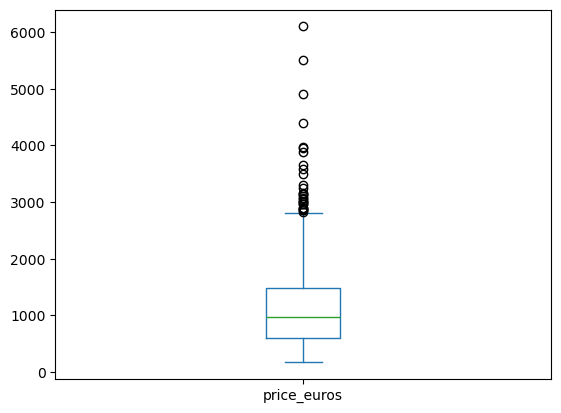

In [14]:
data['price_euros'].plot(kind='box')

Функция для удаления выбросов

In [15]:
def ejection (col):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = q75-q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = data[col][(data[col] > ejection_h) | (data[col] < ejection_l)].count()
    ejection_perc = (ejection_count / len(data)) *100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [16]:
ejection('price_euros')

(2821.2000000000003, -734.3200000000002, 29, 2.225633154259401)

Данные без выбросов

In [17]:
good_data = data[(data['price_euros'] < ejection('price_euros')[0]) & (data['price_euros'] > ejection('price_euros')[1])]

<Axes: ylabel='Frequency'>

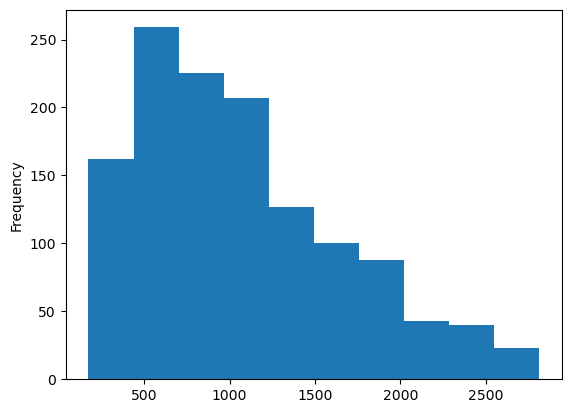

In [18]:
good_data['price_euros'].plot.hist()

In [19]:
good_data = good_data.reset_index(drop=True)

Сократим число типов операционных систем

In [20]:
opsys = good_data['opsys']
opsys = pd.DataFrame(opsys)

typename_2 = good_data['typename']
typename_2 = pd.DataFrame(typename_2)

company_2 = good_data['company']
company_2 = pd.DataFrame(company_2)

In [21]:
values_to_replace_win = ['Windows 10', 'Windows 7', 'Windows 10 S']
new_value_win = 'Windows'
opsys['opsys'].replace(values_to_replace_win, new_value_win, inplace=True)

values_to_replace_mac = ['macOS', 'Mac OS X', 'Chrome OS', 'Android', 'Linux', 'No OS']
new_value_mac = 'others'
opsys['opsys'].replace(values_to_replace_mac, new_value_mac, inplace=True)
opsys_tot = opsys
opsys_tot.columns = ['opsys_tot']

values_to_replace_w = ['Notebook', 'Ultrabook', '2 in 1 Convertible', 'Netbook']
new_value_w = 'daily-working'
typename_2['typename'].replace(values_to_replace_w, new_value_w, inplace=True)

values_to_replace_p = ['Gaming', 'Workstation']
new_value_p = 'highly-productive'
typename_2['typename'].replace(values_to_replace_p, new_value_p, inplace=True)

typename_2.columns = ['typename_2']

values_to_replace_c = ['Lenovo', 'Dell', 'HP', 'Asus', 'Acer', 'Apple']
new_value_c = 'Major brands'
company_2['company'].replace(values_to_replace_c, new_value_c, inplace=True)

values_to_replace_o = ['Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei',
       'Xiaomi', 'Vero', 'Mediacom', 'Samsung', 'Google', 'Fujitsu',
       'Razer', 'LG']
new_value_o = 'others brands'
company_2['company'].replace(values_to_replace_o, new_value_o, inplace=True)

company_2.columns = ['company_2']

Создадим новый столбец с частотой процеесора

In [22]:
cpu = pd.DataFrame(good_data['cpu'])

In [23]:
cpu = cpu['cpu'].str.split(' ', expand=True)

In [24]:
ghz = cpu.iloc[:, -1]
ghz = pd.DataFrame(ghz)

In [25]:
ghz.columns = ['ghz']

In [26]:
ghz['ghz'].fillna(cpu.iloc[:, 4], inplace=True)
ghz['ghz'].fillna(cpu.iloc[:, 3], inplace=True)

создадим новый столбец с маркой процессора

In [27]:
cpu_name = pd.DataFrame(cpu.iloc[:,0])

In [28]:
cpu_name.columns = ['cpu_name']

Создадим новый столбец с маркой видеокарты

In [29]:
gpu = good_data['gpu'].str.split(' ', expand=True)

In [30]:
gpu_name = pd.DataFrame(gpu.iloc[:, 0])

In [31]:
gpu_name.columns = ['gpu_name']

Создадим датафрейм с новыми переменными

In [32]:
good_data_new = pd.concat([good_data, cpu_name, ghz, gpu_name, opsys_tot, typename_2, company_2], axis=1)

In [33]:
good_data_new = good_data_new.drop(['cpu', 'gpu', 'opsys', 'typename', 'company'], axis=1)

In [34]:
good_data_new = good_data_new[good_data_new['cpu_name'] != 'Samsung']

In [35]:
good_data_new['ghz'] = good_data_new['ghz'].apply(weight)

In [36]:
good_data_new.reset_index(drop=True)

,inches,screenresolution,ram,memory,weight,price_euros,cpu_name,ghz,gpu_name,opsys_tot,typename_2,company_2
0,13.3,4096000,8,128,1.37,1339.69,Intel,2.3,Intel,others,daily-working,Major brands
1,13.3,1296000,8,128,1.34,898.94,Intel,1.8,Intel,others,daily-working,Major brands
2,15.6,2073600,8,256,1.86,575.00,Intel,2.5,Intel,others,daily-working,Major brands
3,15.4,5184000,16,512,1.83,2537.45,Intel,2.7,AMD,others,daily-working,Major brands
4,13.3,4096000,8,256,1.37,1803.60,Intel,3.1,Intel,others,daily-working,Major brands
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,14.0,2073600,4,128,1.80,638.00,Intel,2.5,Intel,Windows,daily-working,Major brands
1269,13.3,5760000,16,512,1.30,1499.00,Intel,2.5,Intel,Windows,daily-working,Major brands
1270,14.0,1049088,2,64,1.50,229.00,Intel,1.6,Intel,Windows,daily-working,Major brands
1271,15.6,1049088,6,1,2.19,764.00,Intel,2.5,AMD,Windows,daily-working,Major brands


Создадим новый датафрейм, содержащий только числовый переменные

In [37]:
numeric_columns = good_data_new.select_dtypes(include=[int, float]).reset_index(drop=True)

Применим к данным столбцам нормализацию, так как в будущем будем использовать PCA

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns_norm = scaler.fit_transform(numeric_columns)

In [39]:
numeric_columns_norm = pd.DataFrame(numeric_columns_norm)

In [40]:
numeric_columns_norm.columns = ['inches', 'screenresolution', 'ram', 'memory', 'weight', 'price_euros', 'ghz']

In [41]:
numeric_columns_norm

,inches,screenresolution,ram,memory,weight,price_euros,ghz
0,0.385542,0.094835,0.200000,0.000488,0.173913,0.441591,0.518519
1,0.385542,0.007685,0.200000,0.000488,0.166240,0.274624,0.333333
2,0.662651,0.031888,0.200000,0.000977,0.299233,0.151908,0.592593
3,0.638554,0.128699,0.466667,0.001953,0.291560,0.895331,0.666667
4,0.385542,0.094835,0.200000,0.000977,0.173913,0.617331,0.814815
...,...,...,...,...,...,...,...
1268,0.469880,0.031888,0.066667,0.000488,0.283887,0.175774,0.592593
1269,0.385542,0.146627,0.466667,0.001953,0.156010,0.501941,0.592593
1270,0.469880,0.000000,0.000000,0.000244,0.207161,0.020835,0.259259
1271,0.662651,0.000000,0.133333,0.000004,0.383632,0.223506,0.592593


Импортируем библиотеку для PCA и MCA

In [42]:
import prince

Воспользуемся PCA

In [67]:
num = numeric_columns_norm.drop('price_euros', axis=1)
pca = prince.PCA(
     n_components=6,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )
pca = pca.fit(num)

In [68]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,2.050,34.16%,34.16%
1,1.307,21.78%,55.94%
2,1.003,16.72%,72.66%
3,0.849,14.14%,86.80%
4,0.546,9.09%,95.89%
5,0.246,4.11%,100.00%


In [69]:
pca_num = pca.transform(num) # same as calling ca.fs_r_sup(df_new) for *another* test set.
pca_num.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6']
#pca_num

Применим MCA

In [70]:
cat = good_data_new.select_dtypes(include=[object]).reset_index(drop=True)
mca = prince.MCA(
     n_components=6,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )
mca = mca.fit(cat)

In [71]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.359,29.90%,29.90%
1,0.305,25.38%,55.28%
2,0.206,17.20%,72.48%
3,0.174,14.52%,87.00%
4,0.088,7.34%,94.34%
5,0.068,5.66%,100.00%


In [72]:
mca_cat = mca.transform(cat) # same as calling ca.fs_r_sup(df_new) for *another* test set.
mca_cat.columns =  ['mca_1', 'mca_2', 'mca_3', 'mca_4', 'mca_5', 'mca_6']

In [73]:
#mca_cat

Создадим новый датафрейм с признаками

In [74]:
features = pd.concat([pca_num, mca_cat], axis=1)

In [75]:
features

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,mca_1,mca_2,mca_3,mca_4,mca_5,mca_6
0,-1.137092,0.954543,-0.102507,-0.374685,0.008599,-0.164499,-0.399273,-0.529531,0.860418,0.481387,-0.244620,0.069102
1,-1.533366,0.307453,0.000834,-0.211676,0.658392,-0.092804,-0.399273,-0.529531,0.860418,0.481387,-0.244620,0.069102
2,0.321561,-0.028493,-0.073638,-0.337363,-0.300127,0.410153,-0.399273,-0.529531,0.860418,0.481387,-0.244620,0.069102
3,1.191208,1.446377,-0.050123,-0.351592,0.697974,0.552088,-0.718982,0.351581,1.003685,0.635974,0.669123,0.230431
4,-0.614773,1.444412,-0.177880,-1.265756,-0.717819,-0.180039,-0.399273,-0.529531,0.860418,0.481387,-0.244620,0.069102
...,...,...,...,...,...,...,...,...,...,...,...,...
1268,-0.765450,-0.020401,-0.131967,-0.546542,-0.795798,-0.412420,-0.223807,-0.345452,-0.189590,-0.214172,-0.078232,0.068007
1269,-0.246715,2.212889,-0.039498,-0.563838,1.082513,0.132837,-0.223807,-0.345452,-0.189590,-0.214172,-0.078232,0.068007
1270,-1.842856,-0.776228,-0.033544,0.276743,-0.256705,-0.109256,-0.223807,-0.345452,-0.189590,-0.214172,-0.078232,0.068007
1271,0.408418,-0.544024,-0.107294,-0.344071,-0.564209,-0.008101,-0.543516,0.535660,-0.046323,-0.059585,0.835511,0.229335


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(features.drop(['mca_2'], axis=1), numeric_columns_norm['price_euros'], test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = model.predict(X_test)

# Вычисление коэффициента детерминации (R²)
r_squared = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R²):", r_squared)

Коэффициент детерминации (R²): 0.6743793686161665
